- 均线：对于每一个交易日，都可以计算出前N天的移动平均值，然后把这些移动平均值连起来，成为一条线，就叫做N日移动平均线。常用移动平均线有5天，10天，30天，60天，120天和240天。
    - 5天和10天是短线操作的参考指标，称为日均线指标；
    - 30天和60天是中期均线指标，称为季均线指标；
    - 120天和240天是长期均线指标，称为年均线指标。
    
- 金叉：短期均线上穿长期均线，买入信号
- 死叉：短期均线下穿长期均线，卖出信号


In [50]:
import numpy as np
import pandas as pd
#pd.set_option('display.max_colums',20)
#pd.set_option('display.max_rows',100)
#pd.set_option('display.float_format',lambda x: '%.5f' % x)

import matplotlib.pyplot as plt
import tushare as ts

In [51]:
# df = ts.get_k_data("601318",start='1990-01-01')
# df.to_csv("601318.csv")

In [52]:
df = pd.read_csv("601318.csv", index_col='date', parse_dates=['date'])[['open','close','high','low']]
df

,open,close,high,low
date,,,,
2007-03-01,21.254,19.890,21.666,19.469
2007-03-02,19.979,19.728,20.166,19.503
2007-03-05,19.545,18.865,19.626,18.504
2007-03-06,18.704,19.235,19.554,18.597
2007-03-07,19.252,19.758,19.936,19.090
...,...,...,...,...
2020-06-23,72.500,71.960,72.600,71.670
2020-06-24,72.250,72.260,72.850,72.010
2020-06-29,72.070,71.010,72.260,70.800


In [56]:
# df['ma5'] = np.nan
# df['ma30'] = np.nan

# for i in range(4, len(df)):
#     df.loc[df.index[i],'ma5'] = df['close'][i-4:i+1].mean()
    
# for i in range(29, len(df)):
#     df.loc[df.index[i],'ma30'] = df['close'][i-29:i+1].mean()

df['ma5'] = df['close'].rolling(5).mean()  #rolling()函数
df['ma30'] = df['close'].rolling(30).mean()
df

,open,close,high,low,ma5,ma30
date,,,,,,
2007-03-01,21.254,19.890,21.666,19.469,NaN,NaN
2007-03-02,19.979,19.728,20.166,19.503,NaN,NaN
2007-03-05,19.545,18.865,19.626,18.504,NaN,NaN
2007-03-06,18.704,19.235,19.554,18.597,NaN,NaN
2007-03-07,19.252,19.758,19.936,19.090,19.4952,NaN
...,...,...,...,...,...,...
2020-06-23,72.500,71.960,72.600,71.670,72.9120,73.046000
2020-06-24,72.250,72.260,72.850,72.010,72.7620,73.010000
2020-06-29,72.070,71.010,72.260,70.800,72.2840,72.969333


<function matplotlib.pyplot.show(*args, **kw)>

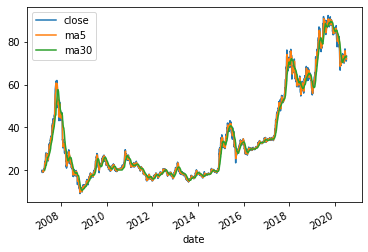

In [57]:
df[['close','ma5','ma30']].plot()
plt.show

In [59]:
df = df.dropna() # 去掉nan数据

In [87]:
# golden_cross = []
# death_cross = []
# for i in range(1,len(df)):
#     if df['ma5'][i] >= df['ma30'][i] and df['ma5'][i-1] < df['ma30'][i-1]:
#         golden_cross.append(df.index[i].to_pydatetime())
#     if df['ma5'][i] <= df['ma30'][i] and df['ma5'][i-1] > df['ma30'][i-1]:
#         death_cross.append(df.index[i].to_pydatetime())
        
# death_cross
# golden_cross

sr1 = df['ma5'] < df['ma30']
sr2 = df['ma5'] >= df['ma30']

death_cross = df[sr1 & sr2.shift(1)].index

golden_cross = df[~(sr1 | sr2.shift(1))].index

#death_cross
#type(golden_cross)

df1 = pd.DataFrame(list(zip(golden_cross,death_cross)),columns=['golden_cross','death_cross'])
df1

,golden_cross,death_cross
0,2007-04-12,2007-06-04
1,2007-06-14,2007-11-06
2,2007-12-10,2007-12-13
3,2008-04-23,2008-05-20
4,2008-07-30,2008-07-31
5,2008-08-06,2008-08-13
6,2008-08-26,2008-09-08
7,2008-11-14,2008-11-24
8,2008-12-05,2009-03-03
9,2009-03-06,2009-04-28


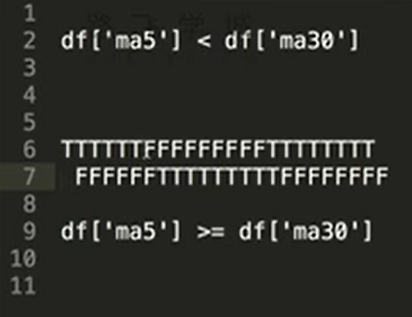

In [71]:
from IPython.display import Image
Image(filename="golden_cross1.png")